<a href="https://colab.research.google.com/github/wh1t3tea/cv/blob/main/cv_pizza_steak_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-09-18 04:47:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.4MB/s    in 6.1s    

2023-09-18 04:47:56 (17.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")

In [ ]:
zip_ref.extractall()
zip_ref.close()

In [ ]:
zip_ref

<zipfile.ZipFile [closed]>

In [ ]:
import os

In [ ]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [ ]:
num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)


  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


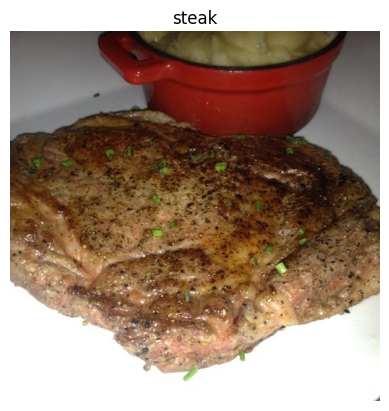

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/', target_class='steak')

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 77,  72,  69],
        [ 77,  72,  69],
        [ 77,  72,  69],
        ...,
        [ 67,  59,  57],
        [ 67,  59,  57],
        [ 66,  58,  56]],

       [[ 80,  75,  72],
        [ 80,  75,  72],
        [ 80,  75,  72],
        ...,
        [ 69,  61,  59],
        [ 68,  60,  58],
        [ 68,  60,  58]],

       [[ 84,  79,  76],
        [ 84,  79,  76],
        [ 84,  79,  76],
        ...,
        [ 71,  63,  61],
        [ 70,  62,  60],
        [ 70,  62,  60]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [135, 127, 125],
        [108, 100,  98],
        [ 91,  83,  81]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [107,  99,  97],
        [ 99,  89,  88],
        [ 97,  87,  86]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [110, 102, 10

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"
train_data = train_gen.flow_from_directory(directory=train_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           seed=42)
valid_data = val_gen.flow_from_directory(directory=test_dir,
                                         batch_size=32,
                                         target_size=(224,224),
                                         class_mode='binary',
                                         seed=42)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 163ms/step - loss: 0.5979 - accuracy: 0.6807 - val_loss: 0.4049 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4430 - accuracy: 0.8020 - val_loss: 0.3714 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3656 - accuracy: 0.8500 - val_loss: 0.3457 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 7s 148ms/step - loss: 0.3100 - accuracy: 0.8787 - val_loss: 0.3343 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.2463 - accuracy: 0.9080 - val_loss: 0.3397 - val_accuracy: 0.8500


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
model_1.predict(valid_data)

16/16 [==============================] - 2s 106ms/step


array([[0.1230232 ],
       [0.2836329 ],
       [0.14464825],
       [0.01436495],
       [0.99686426],
       [0.23189862],
       [0.05105474],
       [0.99427974],
       [0.99066365],
       [0.10723282],
       [0.84629124],
       [0.5329611 ],
       [0.9369859 ],
       [0.96073174],
       [0.8676119 ],
       [0.69321847],
       [0.8687747 ],
       [0.9740414 ],
       [0.03830976],
       [0.03424868],
       [0.7843826 ],
       [0.9426639 ],
       [0.93429905],
       [0.7330329 ],
       [0.14834675],
       [0.60578835],
       [0.57843953],
       [0.76763356],
       [0.8746048 ],
       [0.16599332],
       [0.06995256],
       [0.9977089 ],
       [0.9144407 ],
       [0.9922559 ],
       [0.9901326 ],
       [0.18306093],
       [0.92136115],
       [0.04098127],
       [0.04344165],
       [0.9242228 ],
       [0.9999634 ],
       [0.9990375 ],
       [0.05285184],
       [0.6596394 ],
       [0.12930155],
       [0.7040729 ],
       [0.20482908],
       [0.053

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()

In [ ]:
images[3].shape

(224, 224, 3)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation='relu',
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_4.compile(
    loss='binary_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)
history_4 = model_4.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/20
47/47 [==============================] - 8s 123ms/step - loss: 0.6482 - accuracy: 0.6307 - val_loss: 0.4930 - val_accuracy: 0.7820
Epoch 2/20
47/47 [==============================] - 8s 167ms/step - loss: 0.5031 - accuracy: 0.7660 - val_loss: 0.4229 - val_accuracy: 0.8060
Epoch 3/20
47/47 [==============================] - 7s 143ms/step - loss: 0.4333 - accuracy: 0.8000 - val_loss: 0.3647 - val_accuracy: 0.8460
Epoch 4/20
47/47 [==============================] - 5s 115ms/step - loss: 0.4055 - accuracy: 0.8220 - val_loss: 0.3682 - val_accuracy: 0.8380
Epoch 5/20
47/47 [==============================] - 7s 139ms/step - loss: 0.3900 - accuracy: 0.8173 - val_loss: 0.3400 - val_accuracy: 0.8580
Epoch 6/20
47/47 [==============================] - 5s 112ms/step - loss: 0.3698 - accuracy: 0.8400 - val_loss: 0.3492 - val_accuracy: 0.8340
Epoch 7/20
47/47 [==============================] - 6s 134ms/step - loss: 0.3504 - accuracy: 0.8560 - val_loss: 0.3291 - val_accuracy: 0.8640
Epoch 

In [ ]:
""

''

In [ ]:
train_data

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,)

In [ ]:
train_datage = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
random_image = random.sample(os.listdir('pizza_steak/train/steak'), 1)


img = mpimg.imread('pizza_steak/train/steak' + '/' + random_image[0])

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle=True)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               shuffle=True)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             shuffle=True)

Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Text(0.5, 1.0, 'augmented_image')

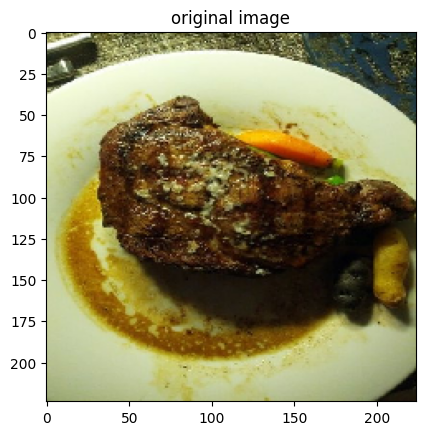

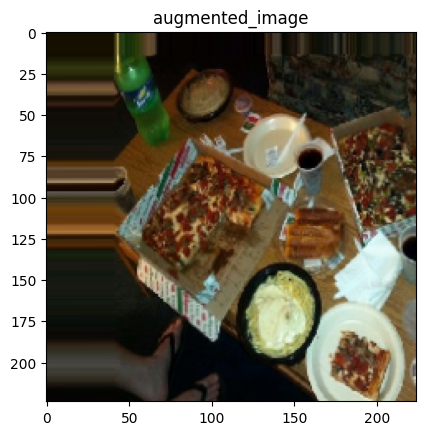

In [ ]:
import random
random_number = random.randint(0 , 32)

plt.imshow(images[random_number])
plt.title('original image')
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('augmented_image')

In [ ]:
model_5 = tf.keras.Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation='relu',
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 459ms/step - loss: 0.6492 - accuracy: 0.6087 - val_loss: 0.5631 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5686 - accuracy: 0.7020 - val_loss: 0.4367 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4918 - accuracy: 0.7593 - val_loss: 0.4033 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 22s 466ms/step - loss: 0.5297 - accuracy: 0.7373 - val_loss: 0.3684 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 21s 448ms/step - loss: 0.4783 - accuracy: 0.7720 - val_loss: 0.3553 - val_accuracy: 0.8500


In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory('pizza_steak/train',
                                                                         target_size=(224, 224),
                                                                         batch_size=32,
                                                                         shuffle=True,
                                                                         class_mode='binary'
)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = tf.keras.Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_7.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 457ms/step - loss: 0.6395 - accuracy: 0.6327 - val_loss: 0.4960 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 20s 436ms/step - loss: 0.5375 - accuracy: 0.7360 - val_loss: 0.4133 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4964 - accuracy: 0.7660 - val_loss: 0.3941 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 21s 439ms/step - loss: 0.4978 - accuracy: 0.7753 - val_loss: 0.3455 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4636 - accuracy: 0.7833 - val_loss: 0.3439 - val_accuracy: 0.8620


In [ ]:
model_8 = tf.keras.Sequential([
  Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_8.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
47/47 [==============================] - 27s 500ms/step - loss: 0.6744 - accuracy: 0.5780 - val_loss: 0.6640 - val_accuracy: 0.5240
Epoch 2/10
47/47 [==============================] - 23s 486ms/step - loss: 0.5768 - accuracy: 0.7040 - val_loss: 0.5847 - val_accuracy: 0.6740
Epoch 3/10
47/47 [==============================] - 23s 489ms/step - loss: 0.5235 - accuracy: 0.7493 - val_loss: 0.3758 - val_accuracy: 0.8520
Epoch 4/10
47/47 [==============================] - 22s 460ms/step - loss: 0.4746 - accuracy: 0.7827 - val_loss: 0.3184 - val_accuracy: 0.8720
Epoch 5/10
47/47 [==============================] - 23s 492ms/step - loss: 0.4444 - accuracy: 0.8007 - val_loss: 0.3069 - val_accuracy: 0.8860
Epoch 6/10
47/47 [==============================] - 23s 489ms/step - loss: 0.4392 - accuracy: 0.8073 - val_loss: 0.3886 - val_accuracy: 0.8320
Epoch 7/10
47/47 [==============================] - 23s 489ms/step - loss: 0.4266 - accuracy: 0.8120 - val_loss: 0.2972 - val_accuracy: 0.8940

In [ ]:
!wget https://iamafoodblog.b-cdn.net/wp-content/uploads/2021/02/how-to-cook-steak-1061w.jpg
steak = mpimg.imread('how-to-cook-steak-1061w.jpg')

--2023-09-18 05:02:09--  https://iamafoodblog.b-cdn.net/wp-content/uploads/2021/02/how-to-cook-steak-1061w.jpg
Resolving iamafoodblog.b-cdn.net (iamafoodblog.b-cdn.net)... 38.104.169.186, 2400:52e0:1500::868:1
Connecting to iamafoodblog.b-cdn.net (iamafoodblog.b-cdn.net)|38.104.169.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404420 (395K) [image/jpeg]
Saving to: ‘how-to-cook-steak-1061w.jpg’

how-to-cook-steak-1 100%[===================>] 394.94K   444KB/s    in 0.9s    

2023-09-18 05:02:11 (444 KB/s) - ‘how-to-cook-steak-1061w.jpg’ saved [404420/404420]



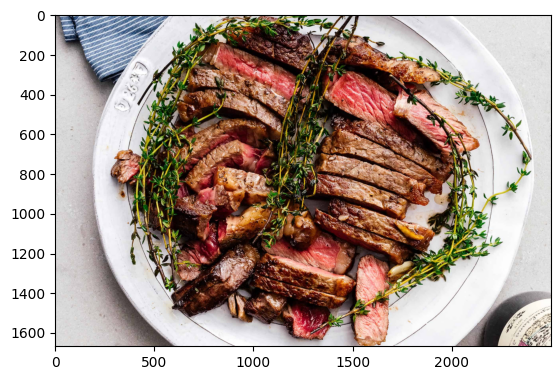

In [ ]:
plt.imshow(steak)

In [ ]:
def load_and_preprocess_img(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img


In [ ]:
img_steak = load_and_preprocess_img('how-to-cook-steak-1061w.jpg', 224)

In [ ]:
model_8.predict(tf.expand_dims(img_steak, axis=0))

1/1 [==============================] - 0s 414ms/step


array([[0.99999905]], dtype=float32)

In [ ]:
!wget https://cdn.britannica.com/08/177308-050-94D9D6BE/Food-Pizza-Basil-Tomato.jpg

--2023-09-18 05:04:01--  https://cdn.britannica.com/08/177308-050-94D9D6BE/Food-Pizza-Basil-Tomato.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 13.224.249.94, 13.224.249.11, 13.224.249.104, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|13.224.249.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192429 (188K) [image/jpeg]
Saving to: ‘Food-Pizza-Basil-Tomato.jpg’

Food-Pizza-Basil-To 100%[===================>] 187.92K   415KB/s    in 0.5s    

2023-09-18 05:04:03 (415 KB/s) - ‘Food-Pizza-Basil-Tomato.jpg’ saved [192429/192429]



In [ ]:
image = load_and_preprocess_img('Food-Pizza-Basil-Tomato.jpg', 224)
# Сначало необходимо загрузить картинку в директорию ноутбука
#!wget *ссылка на вашу фотографию*

In [ ]:
!wget https://interiorscafe.ru/wp-content/uploads/interyer-nebolshoy-pitstserii-ot-dan-troim-v-tel-aviv-01-375x195.jpg

--2023-09-18 05:04:11--  https://interiorscafe.ru/wp-content/uploads/interyer-nebolshoy-pitstserii-ot-dan-troim-v-tel-aviv-01-375x195.jpg
Resolving interiorscafe.ru (interiorscafe.ru)... 95.217.34.161
Connecting to interiorscafe.ru (interiorscafe.ru)|95.217.34.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30827 (30K) [image/jpeg]
Saving to: ‘interyer-nebolshoy-pitstserii-ot-dan-troim-v-tel-aviv-01-375x195.jpg’

interyer-nebolshoy- 100%[===================>]  30.10K   164KB/s    in 0.2s    

2023-09-18 05:04:13 (164 KB/s) - ‘interyer-nebolshoy-pitstserii-ot-dan-troim-v-tel-aviv-01-375x195.jpg’ saved [30827/30827]



In [ ]:
def model_predict(model, image_filename, img_shape):
  img = load_and_preprocess_img(image_filename, img_shape)
  preds = model.predict(tf.expand_dims(img, axis=0))

  if preds >= 0.5:
    plt.imshow(img)
    plt.title(f"It's a steak! with accuracy - {round(preds[0][0], 2)} %")
    plt.tick_params(left= False,
                    bottom= False,
                    labelleft= False ,
                    labelbottom= False)
  else:
    plt.imshow(img)
    plt.tick_params(left= False,
                    bottom= False,
                    labelleft= False ,
                    labelbottom= False)
    plt.title(f"It's a pizza! with accuracy - {round(1 - preds[0][0], 2)} %")

1/1 [==============================] - 0s 20ms/step


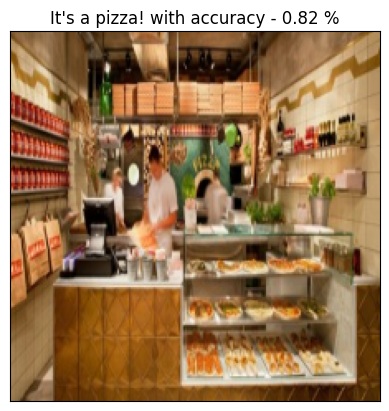

In [ ]:
model_predict(model=final_model, image_filename='interyer-nebolshoy-pitstserii-ot-dan-troim-v-tel-aviv-01-375x195.jpg', img_shape=224)

In [ ]:
final_model = model_8